In [2]:
import numpy as np
import pandas as pd

In [8]:
import pandas as pd

df = pd.read_csv(
    "Exoplanets.csv",
    sep=",",
    comment="#",
    engine="python"
)


In [9]:
df.head()

,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,...,st_meterr2,st_metlim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_age,st_ageerr1,st_ageerr2,st_agelim
0,2,1,323.21000,0.06,-0.05,0.0,1.178,0.00,0.00,0.0,...,-0.10,0.0,1.97823,0.18002,-0.15868,0.0,NaN,NaN,NaN,NaN
1,2,1,326.03000,0.32,-0.32,0.0,1.290,0.05,-0.05,0.0,...,-0.09,0.0,2.24300,0.07100,-0.08500,0.0,NaN,NaN,NaN,NaN
2,2,1,NaN,NaN,NaN,NaN,1.210,0.06,-0.05,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,516.22000,3.25,-3.25,0.0,1.540,0.07,-0.07,0.0,...,-0.04,0.0,NaN,NaN,NaN,NaN,1.56,0.54,-0.54,0.0
4,1,1,516.21997,3.20,-3.20,0.0,1.530,0.07,-0.07,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(39235, 74)

In [13]:
for col in df.columns:
    print(col)


sy_snum
sy_pnum
pl_orbper
pl_orbpererr1
pl_orbpererr2
pl_orbperlim
pl_orbsmax
pl_orbsmaxerr1
pl_orbsmaxerr2
pl_orbsmaxlim
pl_rade
pl_radeerr1
pl_radeerr2
pl_radelim
pl_masse
pl_masseerr1
pl_masseerr2
pl_masselim
pl_msinie
pl_msinieerr1
pl_msinieerr2
pl_msinielim
pl_dens
pl_denserr1
pl_denserr2
pl_denslim
pl_orbeccen
pl_orbeccenerr1
pl_orbeccenerr2
pl_orbeccenlim
pl_insol
pl_insolerr1
pl_insolerr2
pl_insollim
pl_eqt
pl_eqterr1
pl_eqterr2
pl_eqtlim
pl_orbincl
pl_orbinclerr1
pl_orbinclerr2
pl_orbincllim
pl_trandep
pl_trandeperr1
pl_trandeperr2
pl_trandeplim
pl_ratror
pl_ratrorerr1
pl_ratrorerr2
pl_ratrorlim
st_teff
st_tefferr1
st_tefferr2
st_tefflim
st_rad
st_raderr1
st_raderr2
st_radlim
st_mass
st_masserr1
st_masserr2
st_masslim
st_met
st_meterr1
st_meterr2
st_metlim
st_lum
st_lumerr1
st_lumerr2
st_lumlim
st_age
st_ageerr1
st_ageerr2
st_agelim


In [14]:
selected_columns = [
    # System properties
    "sy_snum",
    "sy_pnum",

    # Orbital parameters
    "pl_orbper",
    "pl_orbsmax",
    "pl_orbeccen",

    # Planet physical properties
    "pl_rade",
    "pl_masse",
    "pl_msinie",
    "pl_dens",

    # Energy / temperature
    "pl_insol",
    "pl_eqt",

    # Stellar properties
    "st_teff",
    "st_rad",
    "st_mass",
    "st_lum",
    "st_age",
    "st_met"
]


In [15]:
df_ml = df[selected_columns]


In [16]:
df_ml.shape


(39235, 17)

In [17]:
df_ml.head()


,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_rade,pl_masse,pl_msinie,pl_dens,pl_insol,pl_eqt,st_teff,st_rad,st_mass,st_lum,st_age,st_met
0,2,1,323.21000,1.178,0.238,NaN,NaN,4914.898486,NaN,NaN,NaN,4874.0,13.76,2.09,1.97823,NaN,-0.26
1,2,1,326.03000,1.290,0.231,NaN,NaN,6165.600000,NaN,NaN,NaN,4742.0,19.00,2.70,2.24300,NaN,-0.35
2,2,1,NaN,1.210,NaN,NaN,NaN,5434.700000,NaN,NaN,NaN,NaN,NaN,2.60,NaN,NaN,NaN
3,1,1,516.22000,1.540,0.080,NaN,NaN,3337.070000,NaN,NaN,NaN,4340.0,24.08,1.80,NaN,1.56,0.04
4,1,1,516.21997,1.530,0.080,NaN,NaN,4684.814200,NaN,NaN,NaN,4213.0,29.79,2.78,NaN,NaN,-0.02


In [18]:
df_ml.tail()

,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_rade,pl_masse,pl_msinie,pl_dens,pl_insol,pl_eqt,st_teff,st_rad,st_mass,st_lum,st_age,st_met
39230,2,3,1278.10,2.530,0.267,NaN,NaN,1312.637900,NaN,NaN,NaN,6105.51,1.63649,1.15,0.52541,NaN,0.1014
39231,1,1,385.20,1.180,0.320,NaN,NaN,162.092488,NaN,NaN,NaN,4836.00,11.22000,1.48,1.80003,NaN,-0.2000
39232,1,1,NaN,0.580,NaN,NaN,NaN,642.000000,NaN,NaN,NaN,NaN,NaN,1.40,NaN,NaN,NaN
39233,1,1,136.75,0.680,0.000,NaN,NaN,890.000000,NaN,NaN,NaN,4780.00,12.00000,2.20,1.83885,NaN,-0.2050
39234,1,1,136.97,0.625,0.059,NaN,NaN,616.904938,NaN,NaN,NaN,4841.00,10.86000,1.74,1.76745,NaN,-0.1100


In [19]:
df_ml.isnull().sum()


sy_snum            0
sy_pnum            0
pl_orbper       3293
pl_orbsmax     17267
pl_orbeccen    20506
pl_rade        12182
pl_masse       34459
pl_msinie      36648
pl_dens        36501
pl_insol       22111
pl_eqt         22020
st_teff         3492
st_rad          3257
st_mass         6109
st_lum         29577
st_age         29583
st_met         14449
dtype: int64

In [20]:
missing_percent = (df_ml.isnull().sum() / len(df_ml)) * 100
missing_percent.sort_values(ascending=False)


pl_msinie      93.406397
pl_dens        93.031732
pl_masse       87.827195
st_age         75.399516
st_lum         75.384223
pl_insol       56.355295
pl_eqt         56.123359
pl_orbeccen    52.264560
pl_orbsmax     44.009175
st_met         36.826813
pl_rade        31.048808
st_mass        15.570282
st_teff         8.900217
pl_orbper       8.393016
st_rad          8.301262
sy_pnum         0.000000
sy_snum         0.000000
dtype: float64

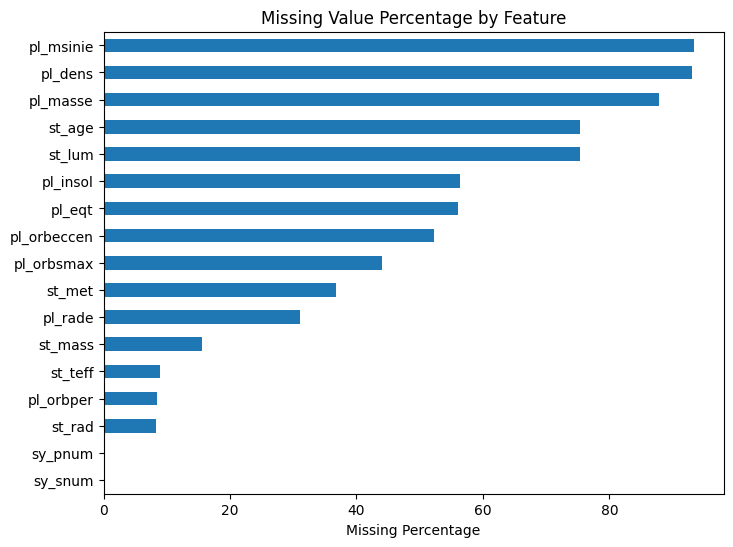

In [21]:
import matplotlib.pyplot as plt

missing_percent.sort_values().plot(kind='barh', figsize=(8,6))
plt.xlabel("Missing Percentage")
plt.title("Missing Value Percentage by Feature")
plt.show()


In [22]:
df_clean = df_ml.copy()


In [ ]:
safe_features = [
    "sy_pnum", "sy_snum",
    "pl_orbper", "pl_orbsmax",
    "st_teff", "st_rad", "st_mass" 
]

for col in safe_features:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)


/var/folders/jq/wzp2rl7d41g0ft2fjvjftxfc0000gn/T/ipykernel_89984/1025247809.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/var/folders/jq/wzp2rl7d41g0ft2fjvjftxfc0000gn/T/ipykernel_89984/1025247809.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [24]:
moderate_features = [
    "pl_eqt", "pl_insol",
    "pl_orbeccen", "st_met"
]

for col in moderate_features:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)


/var/folders/jq/wzp2rl7d41g0ft2fjvjftxfc0000gn/T/ipykernel_89984/523394953.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/var/folders/jq/wzp2rl7d41g0ft2fjvjftxfc0000gn/T/ipykernel_89984/523394953.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [25]:
(df_clean.isnull().sum() / len(df_clean)) * 100


sy_snum         0.000000
sy_pnum         0.000000
pl_orbper       0.000000
pl_orbsmax      0.000000
pl_orbeccen     0.000000
pl_rade        31.048808
pl_masse       87.827195
pl_msinie      93.406397
pl_dens        93.031732
pl_insol        0.000000
pl_eqt          0.000000
st_teff         0.000000
st_rad          0.000000
st_mass         0.000000
st_lum         75.384223
st_age         75.399516
st_met          0.000000
dtype: float64